## Installing Requires Modules

In [6]:
pip install opencv-python

 ## Importing Required Libraries

In [4]:
import pandas as pd
import cv2
import glob
import os
import numpy as np
import skimage.feature as feature
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as pt

#Classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#Performance Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
# Providing the required file locations
pp_and_fe = 'C:/Shirley/Karunya/Results/Projects/Preprocessing and Feature Extraction'
dataset = 'C:/Shirley/Karunya/Results/Projects/RiceLeafsv3'

 ## Preprocessing Images

In [4]:
# Creating the Preprocessing Folder
new_path = os.path.join(pp_and_fe, 'Preprocessed_RiceLeafsv')
os.mkdir(new_path)
print("Preprocessing Images")
# Accessing the test and train datasets
for i in os.listdir(dataset):
    
    #Initializing column arrays
    blue_mean = []
    blue_std = []
    red_mean = []
    red_std = []
    green_mean = []
    green_std = []
    area = []
    perimeter = []
    ratio_green = []
    non_green_ratio = []
    glcm_contrast = []
    glcm_dissimilarity = []
    glcm_homogeneity = []
    glcm_energy = []
    glcm_correlation = []
    dis_type = []
    
    i_path = os.path.join(new_path, i)
    os.mkdir(i_path)
    # Accessing Disease Datasets
    for j in os.listdir(dataset+"/"+i):
        j_path = os.path.join(i_path, j)
        os.mkdir(j_path)
        fin = dataset+"/"+i+"/"+j
        fin_len = len(fin)
        
        #Setting selected variabele
        set = 0
        
        for img in glob.glob(fin+"/*.jpg"):
            #Reading Image
            image = cv2.imread(img)
            cv2.imshow('Original Image', image)
            cv2.waitKey(30)
            #Resizing Image
            img_res = cv2.resize(image, (400, 400))
            cv2.imshow('Resized Image', img_res)
            
            ############################################################
            # COLOR FEATURES- MEAN & STD
            blue_mean.append(np.mean(img_res[:, :, 0]))
            blue_std.append(np.std(img_res[:, :, 0]))
            green_mean.append(np.mean(img_res[:, :, 1]))
            green_std.append(np.std(img_res[:, :, 1]))
            red_mean.append(np.mean(img_res[:, :, 2]))
            red_std.append(np.std(img_res[:, :, 2]))
            ############################################################
            cv2.waitKey(30)
            #Converting to Grayscale
            img_gray = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Grayscale Image', img_gray)
            cv2.waitKey(30)
            #Applying GaussianBlur
            img_gau = cv2.GaussianBlur(img_gray,(5,5),0)
            cv2.imshow('Blurred Image', img_gau)
            cv2.waitKey(30)
            #Applying Otsu's Thresholding for binarizing the image
            T, img_otsu = cv2.threshold(img_gau, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
            cv2.imshow('Binarized Image', img_otsu)
            cv2.waitKey(30)
            #Applying Morphological Transform on image
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
            img_morph = cv2.morphologyEx(img_otsu, cv2.MORPH_CLOSE, kernel)
            cv2.imshow("Morphological Transformed Image: (3,3)", img_morph)
            
            ############################################################
            # SHAPE FEATURES- CONTOURING
            contours,hierarchy = cv2.findContours(img_morph, 1, 2)
            cnt = contours[0]
            area.append(cv2.contourArea(cnt))
            perimeter.append(cv2.arcLength(cnt,True))
            ############################################################
            cv2.waitKey(30)
            #Applying Bitwise AND
            img_bit = cv2.bitwise_and(img_res, img_res, mask = img_morph)
            cv2.imshow("Bitwise AND Image: ", img_bit)
            cv2.waitKey(30)
            #HSV Image Conversion (NEED TO SAVE)
            img_hsv = cv2.cvtColor(img_res, cv2.COLOR_BGR2HSV)
            cv2.imshow("HSV Image: ", img_hsv)
            
            ############################################################
            # GREEN AMOUNT IN IMAGE
            
            hsv_hue = img_hsv[:, :, 0]
            green = 0
            non_green = 0
            for r in hsv_hue:
                for c in r:
                    if c>30 and c<70:
                        green +=1
                    else:
                        non_green += 1

            ratio_green.append(green/(green+non_green))
            non_green_ratio.append(non_green/(green+non_green))
            ############################################################
            cv2.waitKey(30)
            ############################################################
            #Texture Features - GLCM

            gray = cv2.cvtColor(img_bit, cv2.COLOR_BGR2GRAY)
            graycom = feature.graycomatrix(gray, [1], [0])

            glcm_contrast.append(feature.graycoprops(graycom, 'contrast')[0][0])
            glcm_dissimilarity.append(feature.graycoprops(graycom, 'dissimilarity')[0][0])
            glcm_homogeneity.append(feature.graycoprops(graycom, 'homogeneity')[0][0])
            glcm_energy.append(feature.graycoprops(graycom, 'energy')[0][0])
            glcm_correlation.append(feature.graycoprops(graycom, 'correlation')[0][0])
            ############################################################
            
            dis_type.append(j)
            
            #Saving Sample Images
            if set == 0:
                cv2.imwrite(j_path+"/original_"+img[fin_len+1:], image)
                cv2.imwrite(j_path+"/resize_"+img[fin_len+1:], img_res)
                cv2.imwrite(j_path+"/grayscale_"+img[fin_len+1:], img_gray)
                cv2.imwrite(j_path+"/blurred_"+img[fin_len+1:], img_gau)
                cv2.imwrite(j_path+"/thresholded_"+img[fin_len+1:], img_otsu)
                cv2.imwrite(j_path+"/morphed_"+img[fin_len+1:], img_morph)
                cv2.imwrite(j_path+"/bit_"+img[fin_len+1:], img_bit)
                cv2.imwrite(j_path+"/hsv_"+img[fin_len+1:], img_hsv)
            set = 1

        cv2.destroyAllWindows()
    out = {
            'blueMean' : blue_mean,
            'blueStd' : blue_std,
            'redMean' : red_mean,
            'redStd' : red_std,
            'greenMean' : green_mean,
            'greenStd' : green_std,
            'imgArea' : area,
            'imgPer' : perimeter,
            'greenRatio' : ratio_green,
            'nonGreenRatio' : non_green_ratio,
            'contrast' : glcm_contrast,
            'dissimilarity' : glcm_dissimilarity,
            'homogeneity' : glcm_homogeneity,
            'energy' : glcm_energy, 
            'correlation' : glcm_correlation,
            'diseaseType' : dis_type
        }
    print("{} Dataset Preprocessing completed. Writing data into {}.csv...".format(i,i))
    file_name = i+".csv"
    print("Writing into {}.csv complete.".format(i,i))
    df = pd.DataFrame(out)
    df.to_csv(file_name, mode='a', index=False)

Preprocessing Images
test Dataset Preprocessing completed. Writing data into test.csv...
Writing into test.csv complete.
train Dataset Preprocessing completed. Writing data into train.csv...
Writing into train.csv complete.


# *RUN FROM HERE*-----)

## Exploratory Data Analysis

Train Dataset

In [5]:
train = pd.read_csv("train.csv")
train.head()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseType
0,118.009000,94.339131,173.414631,60.295073,170.755262,51.157559,35.5,23.899495,0.429644,0.570356,181.041779,4.093985,0.555428,0.450265,0.972797,bacterial_leaf_blight
1,189.396381,57.559923,220.132275,27.995296,205.709519,26.488245,25.0,18.485281,0.010694,0.989306,139.117043,1.833208,0.885426,0.867256,0.966177,bacterial_leaf_blight
2,117.345681,92.126354,168.607237,62.995784,169.259038,51.802334,18.0,15.656854,0.463112,0.536887,231.837180,3.219373,0.613692,0.436208,0.963723,bacterial_leaf_blight
3,161.178638,83.380784,199.099181,56.736703,191.201325,47.733643,120.0,54.142135,0.239038,0.760962,172.285301,3.064273,0.743836,0.684769,0.969706,bacterial_leaf_blight
4,180.314638,68.730966,215.386212,42.125207,202.910981,37.863636,30.0,21.656854,0.077269,0.922731,149.902807,1.742193,0.845197,0.787961,0.971104,bacterial_leaf_blight


In [6]:
train.tail()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseType
2162,217.929600,81.346928,230.148438,55.055819,238.057337,38.247656,27078.0,952.568542,0.166681,0.833319,223.740100,3.743722,0.843562,0.824901,0.955250,narrow_brown_spot
2163,236.606250,60.081289,242.691156,40.514295,246.604469,27.995809,13213.5,872.041630,0.084300,0.915700,139.106491,1.802870,0.920801,0.911988,0.948598,narrow_brown_spot
2164,234.235463,60.846477,239.747588,45.213761,247.205369,23.907659,16177.0,885.941125,0.104525,0.895475,209.953296,2.895865,0.898807,0.893385,0.947649,narrow_brown_spot
2165,230.795925,71.390634,239.752956,45.749735,240.194344,44.407593,15990.0,884.142135,0.069681,0.930319,167.798283,2.957531,0.899786,0.894544,0.914444,narrow_brown_spot
2166,231.368306,66.364326,238.660450,46.254963,240.388706,41.557309,17561.0,751.740114,0.088025,0.911975,101.430288,1.442055,0.905202,0.885666,0.960815,narrow_brown_spot


In [7]:
train.shape

(2167, 16)

In [8]:
print("No. of duplicates before drop: ", train.duplicated().sum())
print("Size: ", train.shape)
train = train.drop_duplicates()
print("Size: ", train.shape)
print("No. of duplicates after drop: ", train.duplicated().sum())

No. of duplicates before drop:  167
Size:  (2167, 16)
Size:  (2000, 16)
No. of duplicates after drop:  0


In [9]:
print("NA values: ", train.isna().sum().sum())

NA values:  0


In [10]:
le = LabelEncoder()
train["diseaseTypeEncoded"] = le.fit_transform(train["diseaseType"])

In [11]:
train_label = train.drop_duplicates(subset = ["diseaseType"])[["diseaseType","diseaseTypeEncoded"]]
train_label

,diseaseType,diseaseTypeEncoded
0,bacterial_leaf_blight,0
350,brown_spot,1
723,healthy,2
1094,leaf_blast,3
1457,leaf_scald,4
1815,narrow_brown_spot,5


In [12]:
train.columns

Index(['blueMean', 'blueStd', 'redMean', 'redStd', 'greenMean', 'greenStd',
       'imgArea', 'imgPer', 'greenRatio', 'nonGreenRatio', 'contrast',
       'dissimilarity', 'homogeneity', 'energy', 'correlation', 'diseaseType',
       'diseaseTypeEncoded'],
      dtype='object')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2166
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   blueMean            2000 non-null   float64
 1   blueStd             2000 non-null   float64
 2   redMean             2000 non-null   float64
 3   redStd              2000 non-null   float64
 4   greenMean           2000 non-null   float64
 5   greenStd            2000 non-null   float64
 6   imgArea             2000 non-null   float64
 7   imgPer              2000 non-null   float64
 8   greenRatio          2000 non-null   float64
 9   nonGreenRatio       2000 non-null   float64
 10  contrast            2000 non-null   float64
 11  dissimilarity       2000 non-null   float64
 12  homogeneity         2000 non-null   float64
 13  energy              2000 non-null   float64
 14  correlation         2000 non-null   float64
 15  diseaseType         2000 non-null   object 
 16  diseas

In [14]:
train.describe()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseTypeEncoded
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,203.024678,68.918348,216.922565,43.250088,216.810466,39.268945,15088.881500,618.515843,0.156579,0.843421,166.450321,2.257308,0.861405,0.827770,0.953736,2.525500
std,29.526015,15.635300,23.173702,12.253701,23.656309,10.719228,15317.199029,489.677044,0.140506,0.140506,126.209527,1.465463,0.068456,0.096661,0.025620,1.671151
min,15.330113,12.795018,96.510594,9.291409,109.954400,10.103639,0.000000,0.000000,0.000019,0.079269,4.778784,0.208772,0.541526,0.157149,0.813951,0.000000
25%,185.859667,58.001902,199.099570,34.622346,198.178977,31.300219,50.000000,30.727922,0.070688,0.811814,89.131717,1.356823,0.832176,0.789767,0.939690,1.000000
50%,203.236591,70.268904,217.727356,43.210792,212.673950,38.756194,14796.250000,890.681239,0.120775,0.879225,133.742475,1.912356,0.875041,0.849314,0.956520,2.000000
75%,226.992689,79.945677,238.654591,51.782148,240.390317,46.820216,25109.875000,1032.811182,0.188186,0.929312,206.898155,2.700832,0.910692,0.891323,0.970160,4.000000
max,248.109056,112.081470,253.306706,84.976954,252.565575,85.017841,101108.500000,1574.357426,0.920731,0.999981,909.011140,10.278346,0.970499,0.962519,0.998989,5.000000


In [15]:
train.iloc[:,:15].median()

blueMean           203.236591
blueStd             70.268904
redMean            217.727356
redStd              43.210792
greenMean          212.673950
greenStd            38.756194
imgArea          14796.250000
imgPer             890.681239
greenRatio           0.120775
nonGreenRatio        0.879225
contrast           133.742475
dissimilarity        1.912356
homogeneity          0.875041
energy               0.849314
correlation          0.956520
dtype: float64

In [16]:
train.mode()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseType,diseaseTypeEncoded
0,149.821650,45.310881,167.052787,23.067525,188.140838,23.010551,14.0,13.656854,0.050569,0.907225,7.955157,0.311078,0.757871,0.607489,0.888740,healthy,2.0
1,179.514837,48.479042,185.954700,23.074969,189.203644,23.014786,NaN,NaN,0.092775,0.949431,8.611761,0.363703,0.784821,0.691087,0.889550,NaN,NaN
2,179.717637,51.256952,186.458031,24.608333,199.003263,24.659117,NaN,NaN,NaN,NaN,11.168716,0.410739,0.792306,0.694319,0.920281,NaN,NaN
3,199.527488,54.876708,187.705594,24.710053,200.707444,24.661939,NaN,NaN,NaN,NaN,11.510238,0.473684,0.800641,0.726758,0.934114,NaN,NaN
4,203.136675,58.160807,204.194038,24.713443,202.364756,27.619746,NaN,NaN,NaN,NaN,13.620063,0.478158,0.804076,0.731141,0.942260,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.292143,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.607218,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884085,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.129286,NaN,NaN,NaN,NaN,NaN


In [17]:
train.iloc[:,:15].var()

blueMean         8.717856e+02
blueStd          2.444626e+02
redMean          5.370205e+02
redStd           1.501532e+02
greenMean        5.596209e+02
greenStd         1.149018e+02
imgArea          2.346166e+08
imgPer           2.397836e+05
greenRatio       1.974202e-02
nonGreenRatio    1.974202e-02
contrast         1.592884e+04
dissimilarity    2.147581e+00
homogeneity      4.686229e-03
energy           9.343382e-03
correlation      6.563703e-04
dtype: float64

Test Dataset

In [18]:
test = pd.read_csv("test.csv")
test.head()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseType
0,196.546206,49.645478,219.282525,35.982502,206.637075,29.569100,14.0,13.656854,0.072400,0.927600,92.011190,1.480113,0.918402,0.908237,0.949673,bacterial_leaf_blight
1,130.272956,94.797624,184.926787,53.409677,183.818494,47.226956,2301.0,259.539103,0.394356,0.605644,244.160414,4.815952,0.551938,0.429280,0.972725,bacterial_leaf_blight
2,129.845694,93.786567,186.858725,53.496543,182.911487,46.496280,40.5,23.899495,0.318419,0.681581,180.958396,2.338145,0.682696,0.492356,0.977813,bacterial_leaf_blight
3,137.318263,93.914314,182.392388,66.406792,180.227756,54.380679,161.0,57.313708,0.379050,0.620950,255.051479,6.047469,0.609522,0.568873,0.955236,bacterial_leaf_blight
4,161.178638,83.380784,199.099181,56.736703,191.201325,47.733643,120.0,54.142135,0.239038,0.760962,172.285301,3.064273,0.743836,0.684769,0.969706,bacterial_leaf_blight


In [19]:
test.tail()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseType
538,204.084325,89.977550,219.801506,62.762971,223.402631,56.671522,38284.5,1007.154328,0.184744,0.815256,125.131115,2.252155,0.798348,0.754552,0.973954,narrow_brown_spot
539,206.452031,84.862041,221.532975,59.646435,239.598906,28.551773,38981.5,1006.325901,0.248344,0.751656,293.671090,5.355789,0.763544,0.750150,0.968225,narrow_brown_spot
540,213.162225,85.520091,227.093669,57.512889,235.950356,39.808390,30128.0,959.112698,0.188906,0.811094,170.378358,2.602657,0.834141,0.805756,0.967536,narrow_brown_spot
541,219.467013,78.847018,230.439681,54.941718,233.070100,49.291978,26481.0,950.225396,0.129988,0.870012,133.625627,2.061642,0.855062,0.828664,0.963431,narrow_brown_spot
542,180.383725,98.205113,215.024875,56.273579,228.780719,37.708081,52.0,30.485281,0.321169,0.678831,283.896992,4.512431,0.683326,0.627977,0.976457,narrow_brown_spot


In [20]:
test.shape

(543, 16)

In [21]:
print("No. of duplicates before drop: ", test.duplicated().sum())
print("Size: ", test.shape)
test = test.drop_duplicates()
print("Size: ", test.shape)
print("No. of duplicates after drop: ", test.duplicated().sum())

No. of duplicates before drop:  12
Size:  (543, 16)
Size:  (531, 16)
No. of duplicates after drop:  0


In [22]:
print("NA values: ", test.isna().sum().sum())

NA values:  0


In [23]:
test["diseaseTypeEncoded"] = le.fit_transform(test["diseaseType"])

In [24]:
test_label = test.drop_duplicates(subset = ["diseaseType"])[["diseaseType","diseaseTypeEncoded"]]
test_label

,diseaseType,diseaseTypeEncoded
0,bacterial_leaf_blight,0
88,brown_spot,1
181,healthy,2
274,leaf_blast,3
365,leaf_scald,4
455,narrow_brown_spot,5


In [25]:
test.columns

Index(['blueMean', 'blueStd', 'redMean', 'redStd', 'greenMean', 'greenStd',
       'imgArea', 'imgPer', 'greenRatio', 'nonGreenRatio', 'contrast',
       'dissimilarity', 'homogeneity', 'energy', 'correlation', 'diseaseType',
       'diseaseTypeEncoded'],
      dtype='object')

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 542
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   blueMean            531 non-null    float64
 1   blueStd             531 non-null    float64
 2   redMean             531 non-null    float64
 3   redStd              531 non-null    float64
 4   greenMean           531 non-null    float64
 5   greenStd            531 non-null    float64
 6   imgArea             531 non-null    float64
 7   imgPer              531 non-null    float64
 8   greenRatio          531 non-null    float64
 9   nonGreenRatio       531 non-null    float64
 10  contrast            531 non-null    float64
 11  dissimilarity       531 non-null    float64
 12  homogeneity         531 non-null    float64
 13  energy              531 non-null    float64
 14  correlation         531 non-null    float64
 15  diseaseType         531 non-null    object 
 16  diseaseT

In [27]:
test.describe()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseTypeEncoded
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,203.086140,68.782834,217.857806,42.919680,217.359937,39.165646,15281.560264,620.558213,0.156838,0.843162,165.561932,2.242245,0.860044,0.825657,0.953439,2.500942
std,30.774170,15.590538,23.467215,12.072130,24.251782,10.864993,15937.911271,482.605935,0.136485,0.136485,122.782869,1.394910,0.071357,0.099648,0.027359,1.691683
min,40.395150,25.147090,96.517794,10.231676,110.017988,10.114371,0.000000,0.000000,0.000037,0.182562,5.959806,0.224806,0.551859,0.222544,0.849535,0.000000
25%,185.769534,57.213061,199.356619,34.385748,198.589253,30.790310,47.750000,31.192388,0.067166,0.811028,90.012249,1.373891,0.825367,0.787260,0.939486,1.000000
50%,204.451019,70.294170,217.971244,42.178770,213.418494,38.877176,13841.000000,881.798990,0.119181,0.880819,135.839649,1.957074,0.875296,0.847266,0.956840,2.000000
75%,230.262016,80.503836,239.956637,51.018907,241.882487,45.989753,26214.000000,1025.760930,0.188972,0.932834,201.493528,2.737365,0.913211,0.895673,0.970825,4.000000
max,247.880906,107.165783,252.491381,81.894361,252.477975,74.448306,101855.500000,1348.492422,0.817438,0.999962,844.913264,9.089774,0.967885,0.962550,0.998771,5.000000


In [28]:
test.iloc[:,:15].median()

blueMean           204.451019
blueStd             70.294170
redMean            217.971244
redStd              42.178770
greenMean          213.418494
greenStd            38.877176
imgArea          13841.000000
imgPer             881.798990
greenRatio           0.119181
nonGreenRatio        0.880819
contrast           135.839649
dissimilarity        1.957074
homogeneity          0.875296
energy               0.847266
correlation          0.956840
dtype: float64

In [29]:
test.mode()

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseType,diseaseTypeEncoded
0,212.532531,25.147090,233.746719,38.558804,231.671388,28.848452,14.0,13.656854,0.044906,0.823956,12.619029,0.694179,0.761769,0.731855,0.920592,healthy,2.0
1,234.053844,32.240342,246.577250,NaN,245.192544,NaN,NaN,NaN,0.071081,0.871463,104.419148,1.124962,0.827491,0.746936,0.971358,NaN,NaN
2,NaN,33.306208,NaN,NaN,NaN,NaN,NaN,NaN,0.080562,0.882787,124.001955,1.957074,0.831859,0.798996,0.982705,NaN,NaN
3,NaN,33.319193,NaN,NaN,NaN,NaN,NaN,NaN,0.086837,0.895100,158.981040,1.996629,0.877089,0.872865,0.988698,NaN,NaN
4,NaN,33.698367,NaN,NaN,NaN,NaN,NaN,NaN,0.104900,0.913162,451.535965,2.278045,0.905984,0.880606,0.998095,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,NaN,100.776907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,NaN,102.592376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,NaN,104.359752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,NaN,104.849726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
test.iloc[:,:15].var()

blueMean         9.470496e+02
blueStd          2.430649e+02
redMean          5.507102e+02
redStd           1.457363e+02
greenMean        5.881489e+02
greenStd         1.180481e+02
imgArea          2.540170e+08
imgPer           2.329085e+05
greenRatio       1.862822e-02
nonGreenRatio    1.862822e-02
contrast         1.507563e+04
dissimilarity    1.945774e+00
homogeneity      5.091804e-03
energy           9.929645e-03
correlation      7.485083e-04
dtype: float64

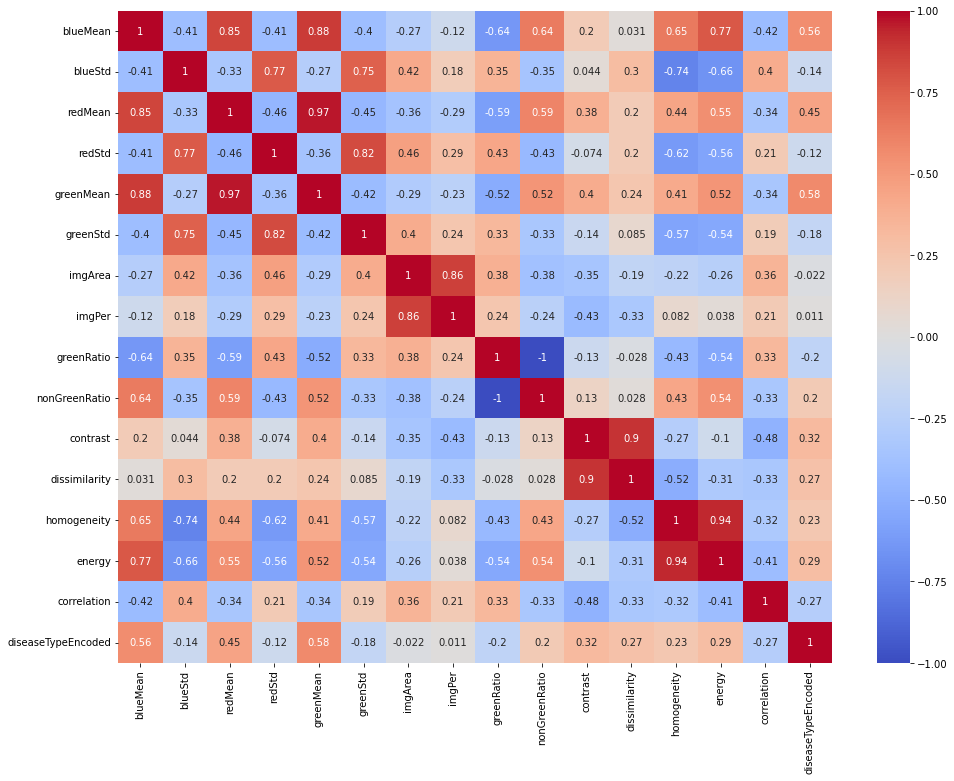

In [43]:
corr = train.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot = True, cmap="coolwarm")
plt.show()

0.967198- "greenMean","redMean"

0.879862- "greenMean", "blueMean"

0.943726- "energy","homogenity"

0.902633- "dissimilarity", "contrast"



0.860521- "imgArea","imgPer"

0.845422- "redMean", "blueMean"

0.822998- "greenStd", "redStd"

In [51]:
corr_test = test.corr()
corr_test.style.background_gradient(cmap='coolwarm')

,blueMean,blueStd,redMean,redStd,greenMean,greenStd,imgArea,imgPer,greenRatio,nonGreenRatio,contrast,dissimilarity,homogeneity,energy,correlation,diseaseTypeEncoded
blueMean,1.000000,-0.490863,0.868422,-0.489969,0.908223,-0.441670,-0.300265,-0.096816,-0.633419,0.633419,0.156149,-0.017565,0.695109,0.795571,-0.422675,0.580897
blueStd,-0.490863,1.000000,-0.433055,0.756043,-0.376140,0.755265,0.416888,0.168882,0.421419,-0.421419,-0.019285,0.248093,-0.740482,-0.698339,0.454153,-0.237811
redMean,0.868422,-0.433055,1.000000,-0.544383,0.972983,-0.504080,-0.411007,-0.287532,-0.600469,0.600469,0.347490,0.142078,0.511538,0.603746,-0.343834,0.468942
redStd,-0.489969,0.756043,-0.544383,1.000000,-0.468319,0.852880,0.443302,0.255326,0.449509,-0.449509,-0.104077,0.163037,-0.630136,-0.604208,0.208438,-0.188963
greenMean,0.908223,-0.376140,0.972983,-0.468319,1.000000,-0.467178,-0.332991,-0.213468,-0.544261,0.544261,0.347515,0.160469,0.501828,0.593834,-0.343656,0.577658
greenStd,-0.441670,0.755265,-0.504080,0.852880,-0.467178,1.000000,0.397646,0.214662,0.348225,-0.348225,-0.147428,0.099569,-0.587521,-0.571155,0.195555,-0.200571
imgArea,-0.300265,0.416888,-0.411007,0.443302,-0.332991,0.397646,1.000000,0.845152,0.394233,-0.394233,-0.403458,-0.246145,-0.223360,-0.297313,0.377527,0.021186
imgPer,-0.096816,0.168882,-0.287532,0.255326,-0.213468,0.214662,0.845152,1.000000,0.207952,-0.207952,-0.479398,-0.376054,0.099354,0.036667,0.213122,0.091318
greenRatio,-0.633419,0.421419,-0.600469,0.449509,-0.544261,0.348225,0.394233,0.207952,1.000000,-1.000000,-0.152019,-0.042869,-0.459385,-0.556219,0.373277,-0.271352
nonGreenRatio,0.633419,-0.421419,0.600469,-0.449509,0.544261,-0.348225,-0.394233,-0.207952,-1.000000,1.000000,0.152019,0.042869,0.459385,0.556219,-0.373277,0.271352


0.972983- "greenMean","redMean"

0.908223- "greenMean", "blueMean"

0.946458- "energy","homogenity"

0.896572- "dissimilarity", "contrast"



0.868422- "redMean", "blueMean"

0.852880- "greenStd", "redStd"

0.845152- "imgArea","imgPer"

In [98]:
col = ["blueMean","redMean","greenMean","contrast","dissimilarity","homogeneity","energy"]
X_train = train[col]
X_test = test[col]

In [99]:
Y_train = train["diseaseTypeEncoded"]
Y_test = test["diseaseTypeEncoded"]

K-NN Classifier:

k = 3

In [100]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
y_pred_knn_3 = knn_3.predict(X_test)

In [102]:
conf_mat_knn_3 = confusion_matrix(Y_test, y_pred_knn_3)
conf_mat_knn_3

array([[79,  1,  0,  0,  3,  1],
       [ 6, 65,  6,  8,  1,  5],
       [ 0, 11, 71, 11,  0,  0],
       [ 2, 12, 17, 51,  3,  3],
       [ 0,  1,  1,  2, 79,  5],
       [ 0,  5,  0,  1,  6, 75]], dtype=int64)

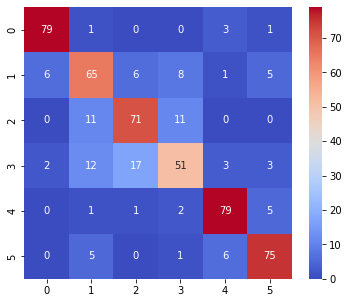

Accuracy:  0.7909604519774012
Precision:  0.7899412237922688
Recall:  0.7929240762944878
f1 score:  0.7903018943379022


In [103]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_knn_3, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_knn_3))
# print(metrics.classification_report(Y_test, y_pred_knn_3, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_knn_3, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_knn_3, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_knn_3, average='macro', pos_label=1))

k = 5

In [104]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, Y_train)

KNeighborsClassifier()

In [105]:
y_pred_knn_5 = knn_5.predict(X_test)

In [106]:
conf_mat_knn_5 = confusion_matrix(Y_test, y_pred_knn_5)
conf_mat_knn_5

array([[79,  0,  0,  0,  3,  2],
       [ 8, 64,  6,  8,  0,  5],
       [ 0,  8, 78,  7,  0,  0],
       [ 4, 16, 19, 41,  6,  2],
       [ 1,  0,  1,  2, 80,  4],
       [ 1,  5,  0,  2,  7, 72]], dtype=int64)

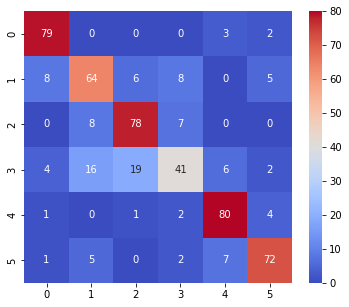

Accuracy:  0.7796610169491526
Precision:  0.7752266497997048
Recall:  0.7808447963481334
f1 score:  0.7735023812507423


In [107]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_knn_5, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_knn_5))
# print(metrics.classification_report(Y_test, y_pred_knn_5, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_knn_5, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_knn_5, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_knn_5, average='macro', pos_label=1))

k = 7

In [108]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [109]:
y_pred_knn_7 = knn_7.predict(X_test)

In [110]:
conf_mat_knn_7 = confusion_matrix(Y_test, y_pred_knn_7)
conf_mat_knn_7

array([[78,  0,  0,  0,  4,  2],
       [10, 60,  5, 10,  1,  5],
       [ 0,  8, 78,  7,  0,  0],
       [ 4,  9, 21, 39,  9,  6],
       [ 1,  0,  1,  2, 80,  4],
       [ 0,  3,  0,  1, 11, 72]], dtype=int64)

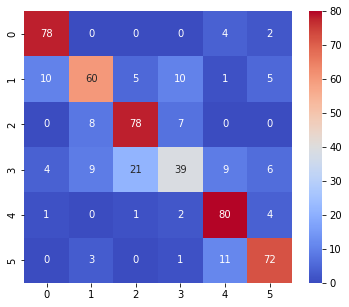

Accuracy:  0.7664783427495292
Precision:  0.760579549229791
Recall:  0.7677467832501205
f1 score:  0.7581331188613865


In [111]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_knn_7, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_knn_7))
# print(metrics.classification_report(Y_test, y_pred_knn_7, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_knn_7, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_knn_7, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_knn_7, average='macro', pos_label=1))

k = 9

In [112]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [113]:
y_pred_knn_9 = knn_9.predict(X_test)

In [114]:
conf_mat_knn_9 = confusion_matrix(Y_test, y_pred_knn_9)
conf_mat_knn_9

array([[76,  0,  0,  0,  6,  2],
       [11, 55,  5,  9,  1, 10],
       [ 0, 10, 75,  8,  0,  0],
       [ 4,  9, 19, 42,  8,  6],
       [ 1,  0,  1,  4, 78,  4],
       [ 0,  3,  0,  1,  9, 74]], dtype=int64)

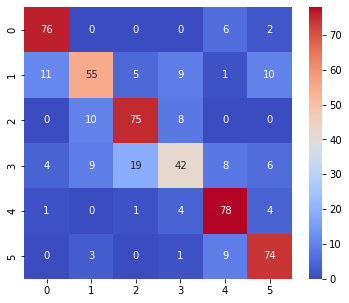

Accuracy:  0.7532956685499058
Precision:  0.7470269810822879
Recall:  0.7549700330567961
f1 score:  0.7463379534770587


In [115]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_knn_9, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_knn_9))
# print(metrics.classification_report(Y_test, y_pred_knn_9, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_knn_9, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_knn_9, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_knn_9, average='macro', pos_label=1))

k = 11

In [116]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [117]:
y_pred_knn_11 = knn_11.predict(X_test)

In [118]:
conf_mat_knn_11 = confusion_matrix(Y_test, y_pred_knn_11)
conf_mat_knn_11

array([[75,  0,  0,  0,  7,  2],
       [12, 52,  6,  9,  2, 10],
       [ 0,  6, 79,  8,  0,  0],
       [ 3,  8, 22, 41,  9,  5],
       [ 2,  0,  0,  4, 76,  6],
       [ 0,  3,  0,  1, 10, 73]], dtype=int64)

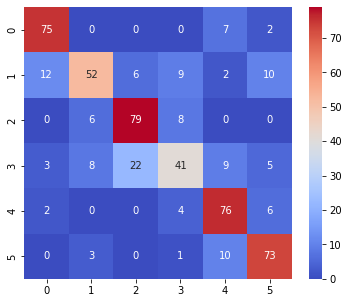

Accuracy:  0.7457627118644068
Precision:  0.7415229808248398
Recall:  0.747062332365447
f1 score:  0.7374666598675935


In [119]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_knn_11, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_knn_11))
# print(metrics.classification_report(Y_test, y_pred_knn_11, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_knn_11, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_knn_11, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_knn_11, average='macro', pos_label=1))

Support Vector Classifier:

In [120]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=2)
rbf_svc.fit(X_train, Y_train)

SVC(C=2, gamma=0.7)

In [121]:
poly_svc = SVC(kernel='poly', degree=3, C=15)
poly_svc.fit(X_train, Y_train)

SVC(C=15, kernel='poly')

In [122]:
y_pred_rbf_svc = rbf_svc.predict(X_test)
y_pred_poly_svc = poly_svc.predict(X_test)

In [123]:
conf_mat_rbf_svc = confusion_matrix(Y_test, y_pred_rbf_svc)
conf_mat_poly_svc = confusion_matrix(Y_test, y_pred_poly_svc)
print("RBF: \n", conf_mat_rbf_svc)
print("Polynomial: \n", conf_mat_poly_svc)

RBF: 
 [[67  0 17  0  0  0]
 [ 0 46 45  0  0  0]
 [ 0  0 92  1  0  0]
 [ 0  0 48 40  0  0]
 [ 0  0 17  0 71  0]
 [ 0  0 27  0  0 60]]
Polynomial: 
 [[78  0  0  0  6  0]
 [ 4 66  8  0  1 12]
 [ 0  8 83  2  0  0]
 [ 0 22 43  6  9  8]
 [ 0  2  0  1 82  3]
 [ 0  4  0  1 14 68]]


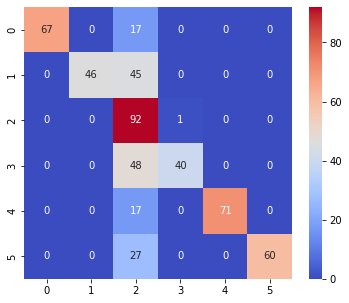

Accuracy:  0.7080979284369114
Precision:  0.8915989159891599
Recall:  0.7072299456198232
f1 score:  0.7385477094989219


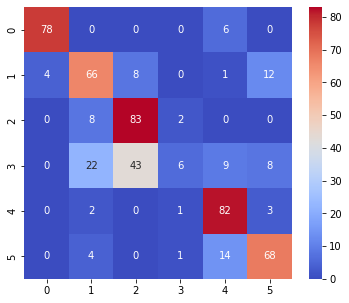

Accuracy:  0.7212806026365348
Precision:  0.7161794875324609
Recall:  0.7213214112546704
f1 score:  0.6769113860717474


In [124]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_rbf_svc, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_rbf_svc))
# print(metrics.classification_report(Y_test, y_pred_rbf_svc, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_rbf_svc, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_rbf_svc, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_rbf_svc, average='macro', pos_label=1))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_poly_svc, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_poly_svc))
# print(metrics.classification_report(Y_test, y_pred_poly_svc, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_poly_svc, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_poly_svc, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_poly_svc, average='macro', pos_label=1))

Naive- Bayes Classifier:

In [125]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [126]:
y_pred_nb = nb.predict(X_test)

In [127]:
conf_mat_nb = confusion_matrix(Y_test, y_pred_nb)
conf_mat_nb

array([[47,  0, 20,  9,  4,  4],
       [10, 16, 32,  5,  6, 22],
       [ 5,  0, 83,  5,  0,  0],
       [ 5,  2, 38, 20, 16,  7],
       [ 2,  1,  0,  0, 71, 14],
       [ 2,  4,  0,  0, 41, 40]], dtype=int64)

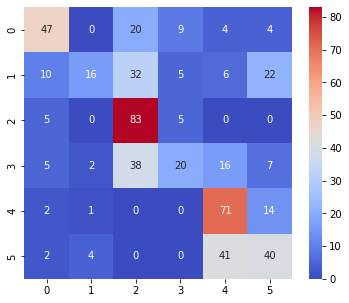

Accuracy:  0.5216572504708098
Precision:  0.5540793620687261
Recall:  0.5202803546101655
f1 score:  0.48571047443328585


In [128]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_nb, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_nb))
# print(metrics.classification_report(Y_test, y_pred_nb, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_nb, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_nb, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_nb, average='macro', pos_label=1))

Decision Tree Classifier: 

In [129]:
dtree = DecisionTreeClassifier(random_state=42)
dtree = dtree.fit(X_train, Y_train)

In [130]:
y_pred_dtree = dtree.predict(X_test)

In [131]:
conf_mat_dtree = confusion_matrix(Y_test, y_pred_dtree)
conf_mat_dtree

array([[80,  2,  0,  0,  2,  0],
       [ 4, 71,  6, 10,  0,  0],
       [ 0,  6, 71, 16,  0,  0],
       [ 1, 12, 10, 63,  0,  2],
       [ 0,  0,  1,  0, 85,  2],
       [ 0,  0,  0,  0,  6, 81]], dtype=int64)

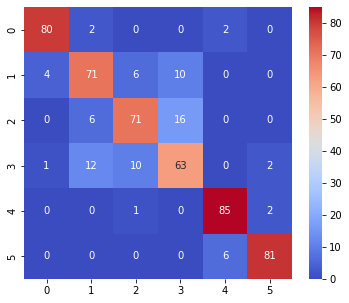

Accuracy:  0.8493408662900188
Precision:  0.8504998787099612
Recall:  0.8514823762320982
f1 score:  0.850741186720541


In [132]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_dtree, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_dtree))
# print(metrics.classification_report(Y_test, y_pred_dtree, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_dtree, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_dtree, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_dtree, average='macro', pos_label=1))

Random forest Classifier:

In [133]:
rf = RandomForestClassifier(random_state=43)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=43)

In [134]:
y_pred_rf = rf.predict(X_test) 

In [135]:
conf_mat_rf = confusion_matrix(Y_test, y_pred_rf)
conf_mat_rf

array([[82,  0,  0,  0,  2,  0],
       [ 3, 78,  5,  5,  0,  0],
       [ 0,  6, 79,  8,  0,  0],
       [ 0, 10, 10, 68,  0,  0],
       [ 1,  0,  0,  0, 86,  1],
       [ 0,  0,  0,  0,  3, 84]], dtype=int64)

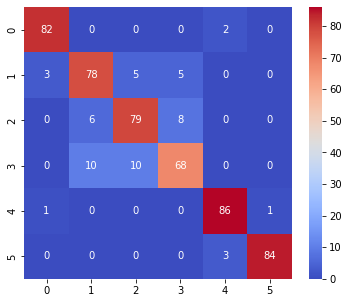

Accuracy:  0.8983050847457628
              precision    recall  f1-score   support

           0   0.953488  0.976190  0.964706        84
           1   0.829787  0.857143  0.843243        91
           2   0.840426  0.849462  0.844920        93
           3   0.839506  0.772727  0.804734        88
           4   0.945055  0.977273  0.960894        88
           5   0.988235  0.965517  0.976744        87

    accuracy                       0.898305       531
   macro avg   0.899416  0.899719  0.899207       531
weighted avg   0.897893  0.898305  0.897740       531

Precision:  0.8994162583437615
Recall:  0.8997188233840069
f1 score:  0.8992067800497011


In [136]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_rf, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,y_pred_rf))
print(metrics.classification_report(Y_test, y_pred_rf, digits=6))
print("Precision: ",precision_score(Y_test, y_pred_rf, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, y_pred_rf, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, y_pred_rf, average='macro', pos_label=1))

In [137]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [138]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [143]:
rfc1=RandomForestClassifier(max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200,  bootstrap=True, random_state=43)

In [144]:
rfc1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200, random_state=43)

In [145]:
pred=rfc1.predict(X_test)

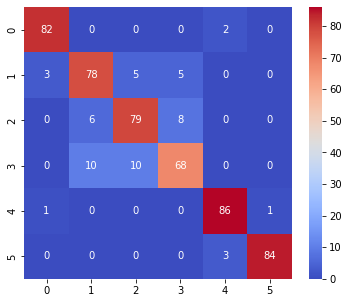

Accuracy:  0.8587570621468926
              precision    recall  f1-score   support

           0   0.952941  0.964286  0.958580        84
           1   0.747475  0.813187  0.778947        91
           2   0.833333  0.806452  0.819672        93
           3   0.772152  0.693182  0.730539        88
           4   0.894737  0.965909  0.928962        88
           5   0.963855  0.919540  0.941176        87

    accuracy                       0.858757       531
   macro avg   0.860749  0.860426  0.859646       531
weighted avg   0.858962  0.858757  0.857915       531

Precision:  0.8607489033008093
Recall:  0.8604258798919533
f1 score:  0.8596460871005337


In [146]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_rf, annot=True, cmap = 'coolwarm')
plt.show()
print("Accuracy: ",accuracy_score(Y_test,pred))
print(metrics.classification_report(Y_test, pred, digits=6))
print("Precision: ",precision_score(Y_test, pred, average='macro', pos_label=1))
print("Recall: ",recall_score(Y_test, pred, average='macro', pos_label=1))
print("f1 score: ",f1_score(Y_test, pred, average='macro', pos_label=1))